In [18]:
import os
import shutil
import random
import numpy as np
np.random.seed(33)
import cv2 as cv
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

!pip3 install scikit-image --upgrade

In [2]:
!git clone https://github.com/lucianosilva-github/G6_iris_recognition.git
import G6_iris_recognition

Cloning into 'G6_iris_recognition'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 31 (delta 3), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [3]:
!git clone https://github.com/lucianosilva-github/images.git

Cloning into 'images'...
remote: Enumerating objects: 1266, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 1266 (delta 1), reused 0 (delta 0), pack-reused 1246
Receiving objects: 100% (1266/1266), 189.65 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (1163/1163), done.


In [19]:
def plot_images(columns,rows):
  fig = plt.figure(figsize=(8, 8))
  c = 0
  list_image=[]
  for i in range(1, columns*rows +1):
    try:
      if c<10:
        img = cv.cvtColor(cv.imread(f"images/000{c}/000{c}_00{c}.bmp"), cv.COLOR_BGR2GRAY)
      else:
        img = cv.cvtColor(cv.imread(f'images/00{c}/00{c}_00{c}.bmp'), cv.COLOR_BGR2GRAY)
      list_image.append(img)
    except:
      print("image not exist")
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='gray')
    c +=1
  plt.show()
  return list_image,columns,rows

def plot_hist_by_list(list_image,columns,rows):
  fig = plt.figure(figsize=(8, 8))
  for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.hist(list_image[i-1].ravel(),bins=50,range=[0,255])
  plt.show()


def remove_white_circles(img):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] >250:
        img[i][j-3] = img[i][j-15]
        img[i][j]= img[i][j-3]
        # img[i][j] = (img[i-1][j] + img[i+1][j] + img[i][j+1] + img[i][j-1]) / 4
  return img

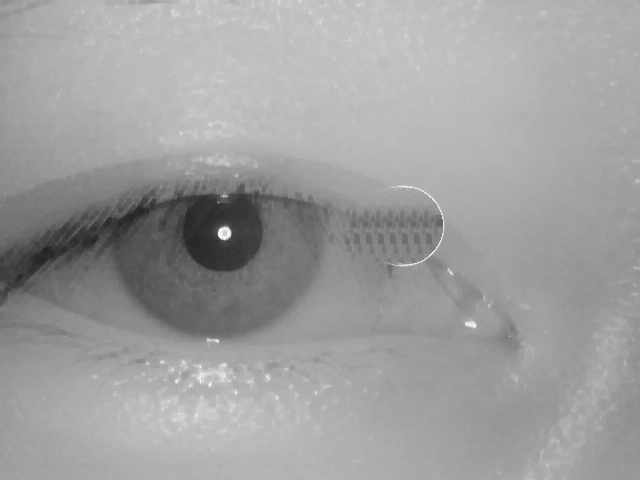

In [20]:
#img = cv.cvtColor(cv.imread('images/0000/0000_000.bmp'), cv.COLOR_BGR2GRAY)
dst = cv.equalizeHist(img)
kernel = np.ones((4,4),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
closing2 = cv.morphologyEx(dst, cv.MORPH_CLOSE, kernel)

cv2_imshow(closing)


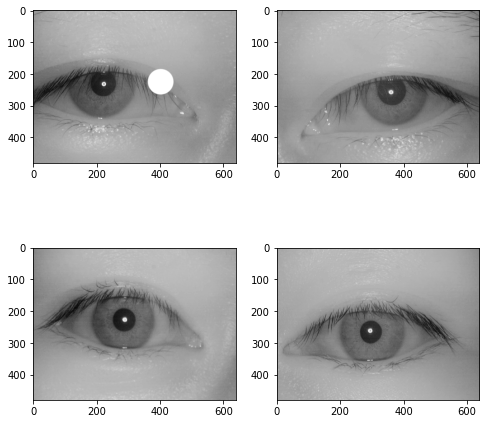

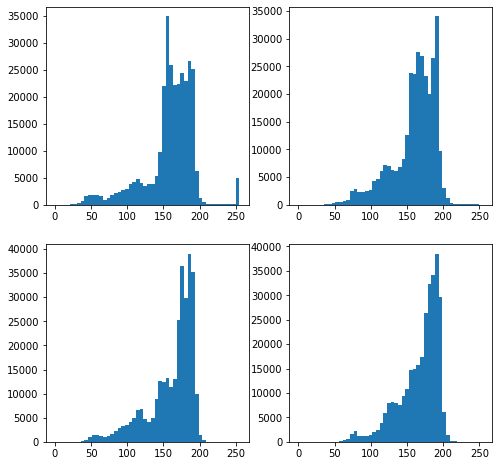

In [21]:
list_image,columns,rows = plot_images(2,2)
plot_hist_by_list(list_image,columns,rows)

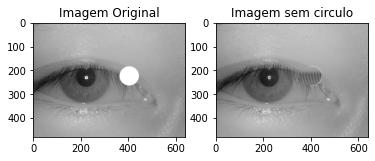

In [16]:
img = cv.cvtColor(cv.imread('images/0000/0000_000.bmp'), cv.COLOR_BGR2GRAY)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.imshow(img,cmap='gray')
plt.title("Imagem Original")

img2 = remove_white_circles(img)
plt.subplot(1, 2, 2) # index 2
plt.imshow(img2,cmap='gray')
plt.title("Imagem sem circulo")
plt.show()

In [ ]:
if os.path.exists('/content/images/.git'):
  shutil.rmtree("images/.git")
# melhorando qualidade de imagens
for i in os.listdir("images"):
  for j in os.listdir(f"images/{i}"):
    img = cv.cvtColor(cv.imread(f'images/{i}/{j}'), cv.COLOR_BGR2GRAY)
    dst = cv.equalizeHist(img)
    cv.imwrite(f'images/{i}/{j}',dst)

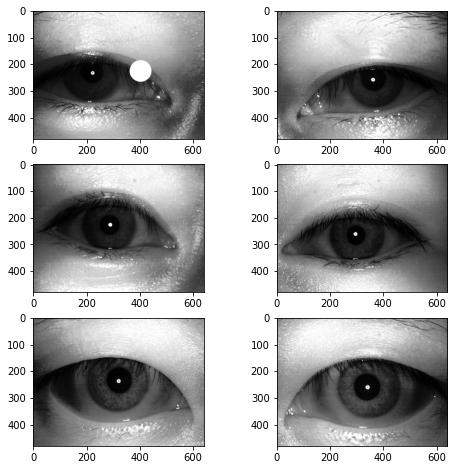

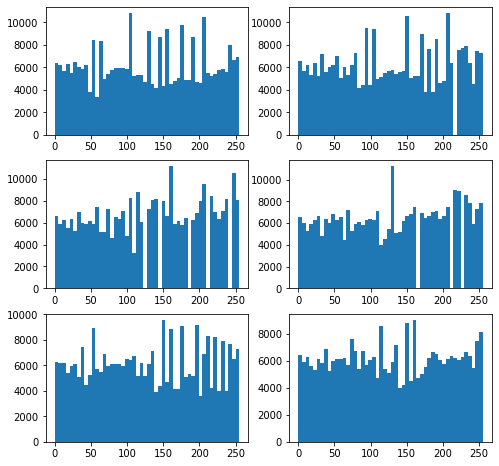

In [ ]:
list_image,columns,rows = plot_images(2,3)
plot_hist_by_list(list_image,columns,rows)

In [ ]:
if not os.path.exists('/content/model.pickle'):
    os.mknod('/content/model.pickle')
path = "/content/images_all"
# list_directorys=['/content/images_all',"/content/test_images","/content/train_images"]
list_directorys=["/content/test_images"]

for i in list_directorys:
  try:
      os.mkdir(i,0o666)
  except OSError:
      print ("Creation of the directory %s failed" % i)
  else:
    print ("Successfully created the directory %s " % i)
shutil.copytree('images', 'train_images')

Successfully created the directory /content/test_images 


'train_images'

In [ ]:
for i in os.listdir('train_images'):
  lista_temp = []
  for j in os.listdir(f'train_images/{i}'):
    lista_temp.append(f'train_images/{i}/{j}')
  random.shuffle(lista_temp)
  size = len(lista_temp)
  test_size = int(0.2*size)
  test_image = lista_temp[0:test_size]
  for image in test_image:
    shutil.move(image, 'test_images')

In [ ]:
G6_iris_recognition.iris_model_train("train_images","model.pickle")

directory_list ['train_images/0014', 'train_images/0047', 'train_images/0034', 'train_images/0030', 'train_images/0016', 'train_images/0052', 'train_images/0054', 'train_images/0053', 'train_images/0035', 'train_images/0059', 'train_images/0022', 'train_images/0056', 'train_images/0008', 'train_images/0023', 'train_images/0011', 'train_images/0021', 'train_images/0042', 'train_images/0006', 'train_images/0009', 'train_images/0046', 'train_images/0038', 'train_images/0010', 'train_images/0025', 'train_images/0041', 'train_images/0051', 'train_images/0029', 'train_images/0013', 'train_images/0000', 'train_images/0027', 'train_images/0037', 'train_images/0018', 'train_images/0031', 'train_images/0003', 'train_images/0005', 'train_images/0040', 'train_images/0048', 'train_images/0032', 'train_images/0026', 'train_images/0017', 'train_images/0001', 'train_images/0007', 'train_images/0036', 'train_images/0015', 'train_images/0033', 'train_images/0020', 'train_images/0049', 'train_images/0019

['0052', '0007', '0028']

In [ ]:
match = 0
unmatch = 0
for i in os.listdir("test_images"):
  iris_name = G6_iris_recognition.iris_model_test("model.pickle",f"test_images/{i}")
  if iris_name!='unmatch':
    match +=1
    print(iris_name)
  else:
    unmatch +=1
  #print(iris_name!='unmatch')
print(f"acertos: {round(match*100/(unmatch + match))}%")

0007
locate expression 1 index 640 is out of bounds for axis 1 with size 640
rectangle expression2 not enough values to unpack (expected 2, got 1)
0007
rectangle expression1
rectangle expression1
0028
0007
rectangle expression1
locate expression 1 index 640 is out of bounds for axis 1 with size 640
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 local variable 'north_mark' referenced before assignment
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 index 640 is out of bounds for axis 1 with size 640
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 local variable 'west_mark' referenced before assignment
rectangle expression2 not enough values to unpack (expected 2, got 1)
0007
locate expression 1 index 640 is out of bounds for axis 1 with size 640
rectangle expression2 not enough values to unpack (expected 2, got 1)
locate expression 1 index 640 is out of bounds f

In [ ]:
iris_name = G6_iris_recognition.iris_model_test("model.pickle",f"train_images/0000/0000_004.bmp")
iris_name

locate expression 1 local variable 'east_mark' referenced before assignment
rectangle expression2 not enough values to unpack (expected 2, got 1)


'unmatch'